<a href="https://colab.research.google.com/github/AhmedFahim-git/IBM-machine-learning/blob/main/IBM_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.weightstats import ttest_ind

import re
import requests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')
with open('glass.data', 'wb') as f:
  f.write(r.content)

r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names')
with open('glass.names', 'wb') as f:
  f.write(r.content)

In [ ]:
with open('glass.names') as f:
  print(f.read())

1. Title: Glass Identification Database

2. Sources:
    (a) Creator: B. German
        -- Central Research Establishment
           Home Office Forensic Science Service
           Aldermaston, Reading, Berkshire RG7 4PN
    (b) Donor: Vina Spiehler, Ph.D., DABFT
               Diagnostic Products Corporation
               (213) 776-0180 (ext 3014)
    (c) Date: September, 1987

3. Past Usage:
    -- Rule Induction in Forensic Science
       -- Ian W. Evett and Ernest J. Spiehler
       -- Central Research Establishment
          Home Office Forensic Science Service
          Aldermaston, Reading, Berkshire RG7 4PN
       -- Unknown technical note number (sorry, not listed here)
       -- General Results: nearest neighbor held its own with respect to the
             rule-based system

4. Relevant Information:n
      Vina conducted a comparison test of her rule-based system, BEAGLE, the
      nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is 
      a product available 

In [3]:
cols = []

with open('glass.names') as f:
  
  for line in f.readlines():
    tmp = re.findall(r'^\s+(\d+\.[a-zA-Z ]+): (?! +)', line)
    if len(tmp)>0:
      num, name = tmp[0].split('. ')
      
      cols.append(name.strip())
      print(tmp)
cols

['1. Id number']
['2. RI']
['3. Na']
['4. Mg']
['5. Al']
['6. Si']
['7. K']
['8. Ca']
['9. Ba']
['10. Fe']
['11. Type of glass']


['Id number',
 'RI',
 'Na',
 'Mg',
 'Al',
 'Si',
 'K',
 'Ca',
 'Ba',
 'Fe',
 'Type of glass']

In [4]:
df = pd.read_csv('glass.data',names=cols,  header=None, index_col=0)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [5]:
names = {}

with open('glass.names') as f:
  
  for line in f.readlines():
    tmp = re.findall(r'^\s{5,6}-- (\d+ [a-zA-Z_]+)', line)
    if len(tmp)>0:
      num, name = tmp[0].strip().split(' ')
      names[int(num)] = name
      
      print(tmp)
names

['1 building_windows_float_processed']
['2 building_windows_non_float_processed']
['3 vehicle_windows_float_processed']
['4 vehicle_windows_non_float_processed']
['5 containers']
['6 tableware']
['7 headlamps']


{1: 'building_windows_float_processed',
 2: 'building_windows_non_float_processed',
 3: 'vehicle_windows_float_processed',
 4: 'vehicle_windows_non_float_processed',
 5: 'containers',
 6: 'tableware',
 7: 'headlamps'}

In [6]:
df2 = df.copy()
df2['Type of glass'].replace(names, inplace=True)
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps


In [7]:
with open('glass.names') as f:
  file_str = f.read()
  tmp = re.findall(r'(Summary Statistics:.+)9. Class Distribution', file_str, flags=re.DOTALL)
  print(tmp[0].strip())

with open('summ_stats.txt','w') as f:
  f.write(re.sub(r' {2,}', ';',tmp[0].strip()))

Summary Statistics:
Attribute:   Min     Max      Mean     SD      Correlation with class
 2. RI:       1.5112  1.5339   1.5184  0.0030  -0.1642
 3. Na:      10.73   17.38    13.4079  0.8166   0.5030
 4. Mg:       0       4.49     2.6845  1.4424  -0.7447
 5. Al:       0.29    3.5      1.4449  0.4993   0.5988
 6. Si:      69.81   75.41    72.6509  0.7745   0.1515
 7. K:        0       6.21     0.4971  0.6522  -0.0100
 8. Ca:       5.43   16.19     8.9570  1.4232   0.0007
 9. Ba:       0       3.15     0.1750  0.4972   0.5751
10. Fe:       0       0.51     0.0570  0.0974  -0.1879


In [8]:
with open('glass.names') as f:
  file_str = f.read()
  tmp = re.findall(r'9. (Class Distribution:.+)', file_str, flags=re.DOTALL)
  print(tmp[0].strip())

with open('class_dist.txt','w') as f:
  f.write(tmp[0].strip())

Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


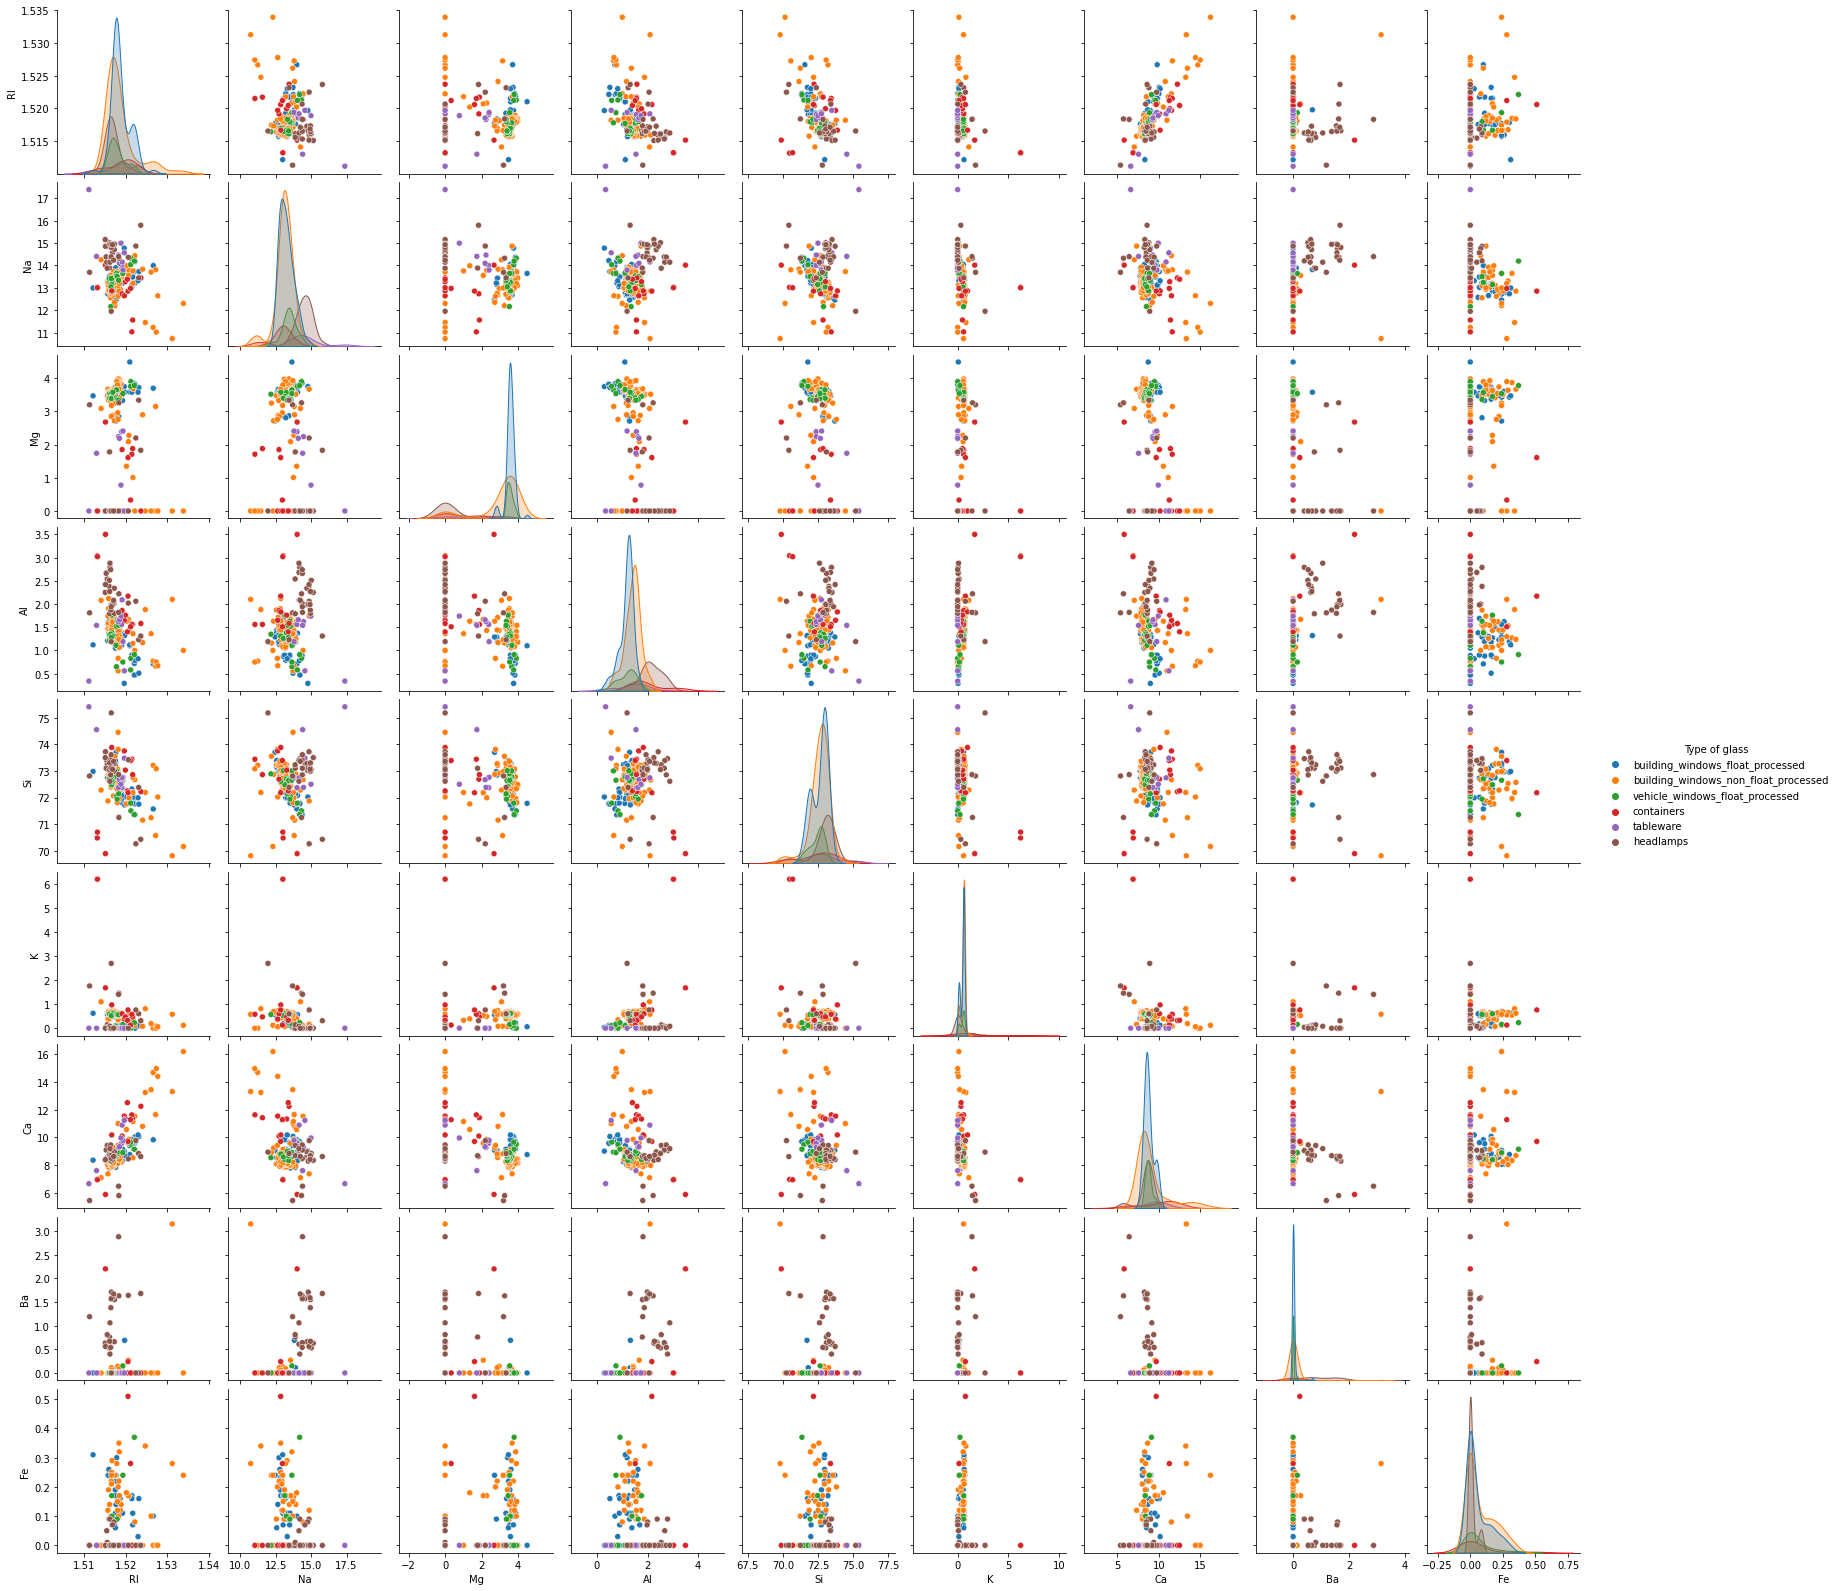

In [ ]:
sns.pairplot(df2, hue='Type of glass');
plt.savefig('Overall pairplot.png', bbox_inches='tight');

In [9]:
df3 = df2.copy()
df3['Window_or_not'] = df3['Type of glass'].apply(lambda x: 'Window glass' if 'window' in x else 'Non-window glass')

df3

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Window_or_not
Id number,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed,Window glass
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed,Window glass
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed,Window glass
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed,Window glass
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed,Window glass
...,...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps,Non-window glass
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps,Non-window glass
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps,Non-window glass


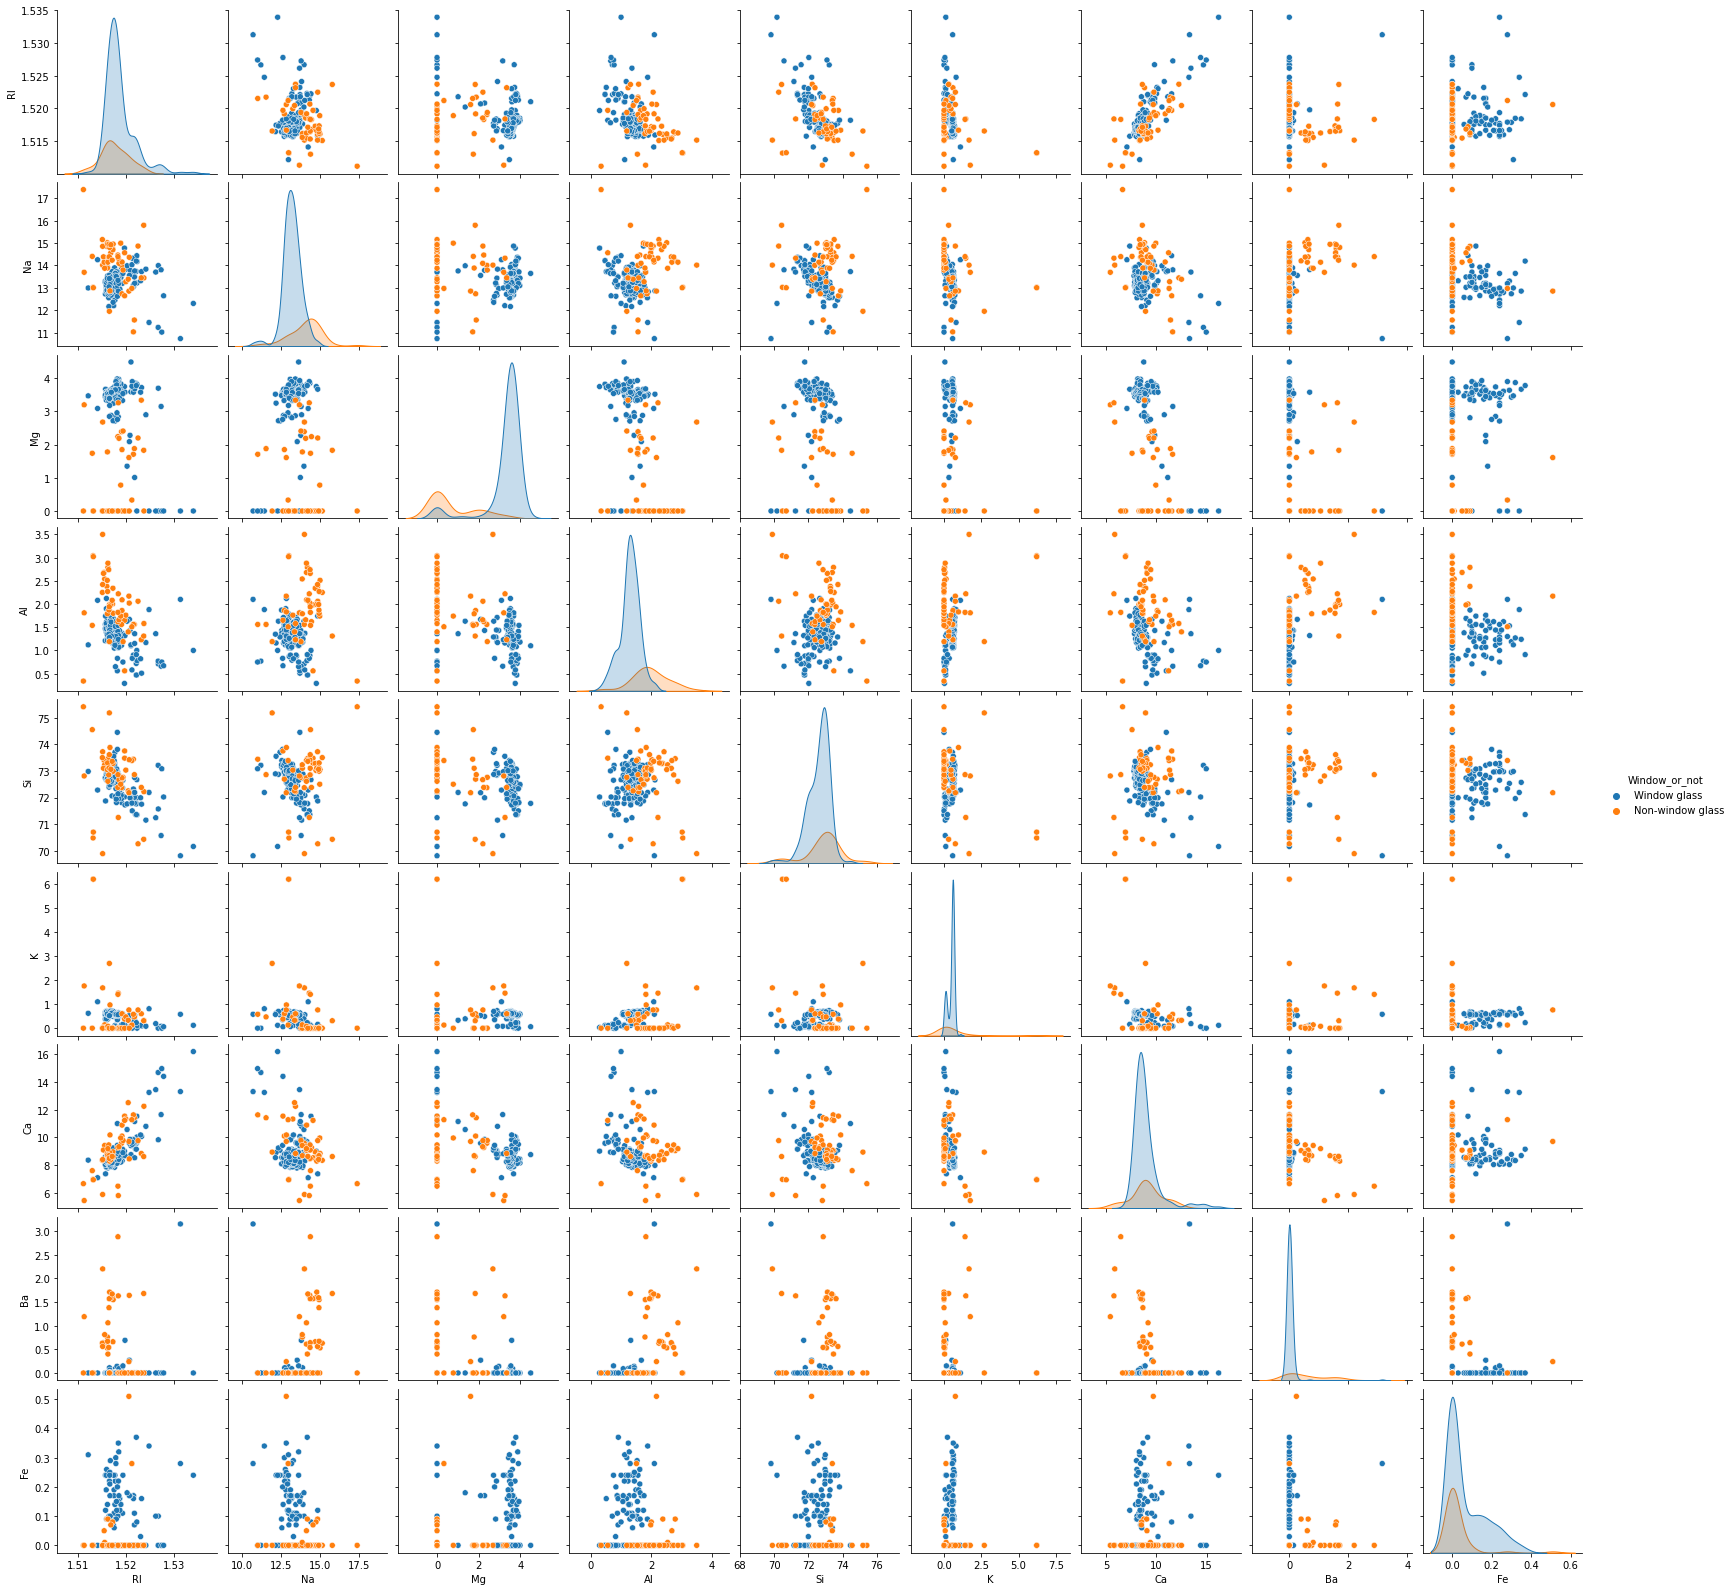

In [ ]:
sns.pairplot(df3.drop(columns='Type of glass'), hue='Window_or_not')
plt.savefig('Window vs non-window pairplot.png', bbox_inches='tight')

In [20]:
tstats, pvals, _ = ttest_ind(df3.loc[df3['Window_or_not'] =='Window glass', cols[1:-1]], df3.loc[df3['Window_or_not'] =='Non-window glass', cols[1:-1]], usevar='unequal')

alpha = 0.05
fwer = 1-(1-alpha)**8

bool_res, pvals_cor, _, alpha_bon = multipletests(pvals, alpha= fwer, method='bonferroni')

print('The variables found to be significant are:')
print('\n'.join([col for i, col in enumerate(cols[1:-1]) if bool_res[i]]))
print()

print('The corrected pvals are:')
print(pvals_cor)
print()

print('The Bonferroni correction is')
print(alpha_bon)

The variables found to be significant are:
Na
Mg
Al
Ba
Fe

The corrected pvals are:
[4.15298031e-01 6.61694304e-06 4.86374257e-23 9.20307682e-10
 8.74464935e-01 1.00000000e+00 1.00000000e+00 4.19263450e-06
 1.72487826e-02]

The Bonferroni correction is
0.03739772985677086


In [21]:
df4 = df3.loc[df3['Window_or_not']=='Window glass',:].copy()
df4['Float vs non_float'] = df4['Type of glass'].apply(lambda x: 'Non-float glass' if 'non_float' in x else 'Float glass')

df4

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Window_or_not,Float vs non_float
Id number,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,building_windows_float_processed,Window glass,Float glass
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,building_windows_float_processed,Window glass,Float glass
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,building_windows_float_processed,Window glass,Float glass
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,building_windows_float_processed,Window glass,Float glass
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,building_windows_float_processed,Window glass,Float glass
...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00,vehicle_windows_float_processed,Window glass,Float glass
160,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09,vehicle_windows_float_processed,Window glass,Float glass
161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,vehicle_windows_float_processed,Window glass,Float glass


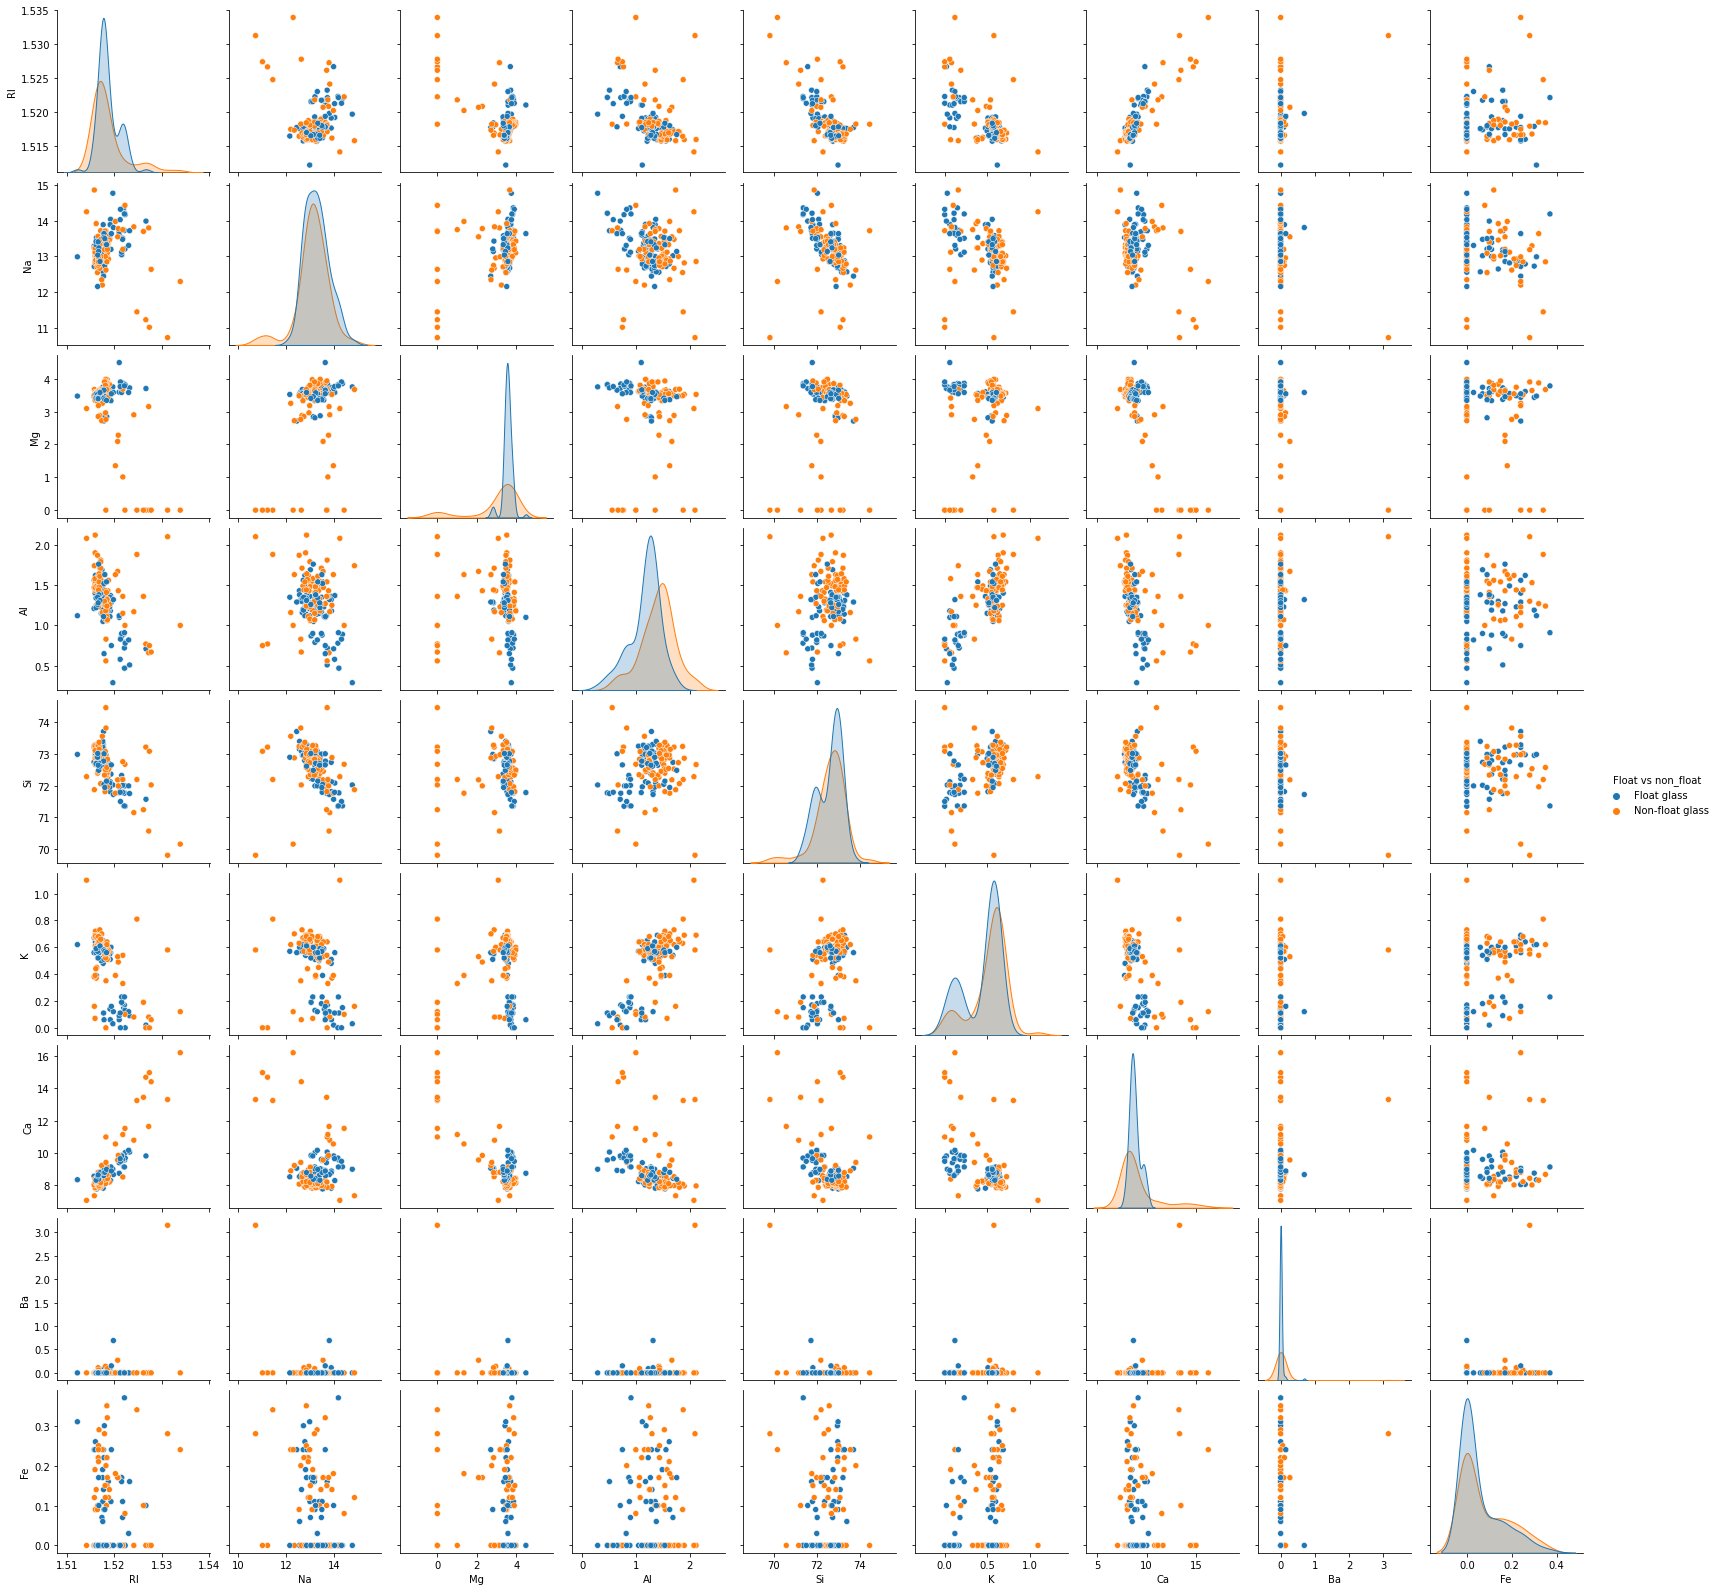

In [ ]:
sns.pairplot(df4.drop(columns=['Type of glass','Window_or_not']), hue='Float vs non_float')
plt.savefig('Float vs non-float pairplot.png', bbox_inches='tight')

In [28]:
tstats, pvals, _ = ttest_ind(df4.loc[df4['Float vs non_float'] =='Float glass', cols[1:-1]], df4.loc[df4['Float vs non_float'] =='Non-float glass', cols[1:-1]], usevar='unequal')

alpha = 0.05
fwer = 1-(1-alpha)**8

bool_res, pvals_cor, _, alpha_bon = multipletests(pvals, alpha= fwer, method='bonferroni')

print('The variables found to be significant are:')
print('\n'.join([col for i, col in enumerate(cols[1:-1]) if bool_res[i]]))
print()

print('The corrected pvals are:')
print(pvals_cor)
print()

print('The Bonferroni correction is')
print(alpha_bon)

The variables found to be significant are:
Mg
Al
K

The corrected pvals are:
[1.00000000e+00 6.58231081e-01 1.97243153e-03 1.66717627e-05
 1.00000000e+00 1.52052953e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00]

The Bonferroni correction is
0.03739772985677086


In [29]:
df5 = df4.loc[df4['Float vs non_float']=='Float glass',:].copy()
df5['Building_vs_vehicle'] = df5['Type of glass'].apply(lambda x: 'Building glass' if 'building' in x else 'Vehicle glass')

df5

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Window_or_not,Float vs non_float,Building_vs_vehicle
Id number,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,building_windows_float_processed,Window glass,Float glass,Building glass
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,building_windows_float_processed,Window glass,Float glass,Building glass
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,building_windows_float_processed,Window glass,Float glass,Building glass
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,building_windows_float_processed,Window glass,Float glass,Building glass
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,building_windows_float_processed,Window glass,Float glass,Building glass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00,vehicle_windows_float_processed,Window glass,Float glass,Vehicle glass
160,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09,vehicle_windows_float_processed,Window glass,Float glass,Vehicle glass
161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,vehicle_windows_float_processed,Window glass,Float glass,Vehicle glass


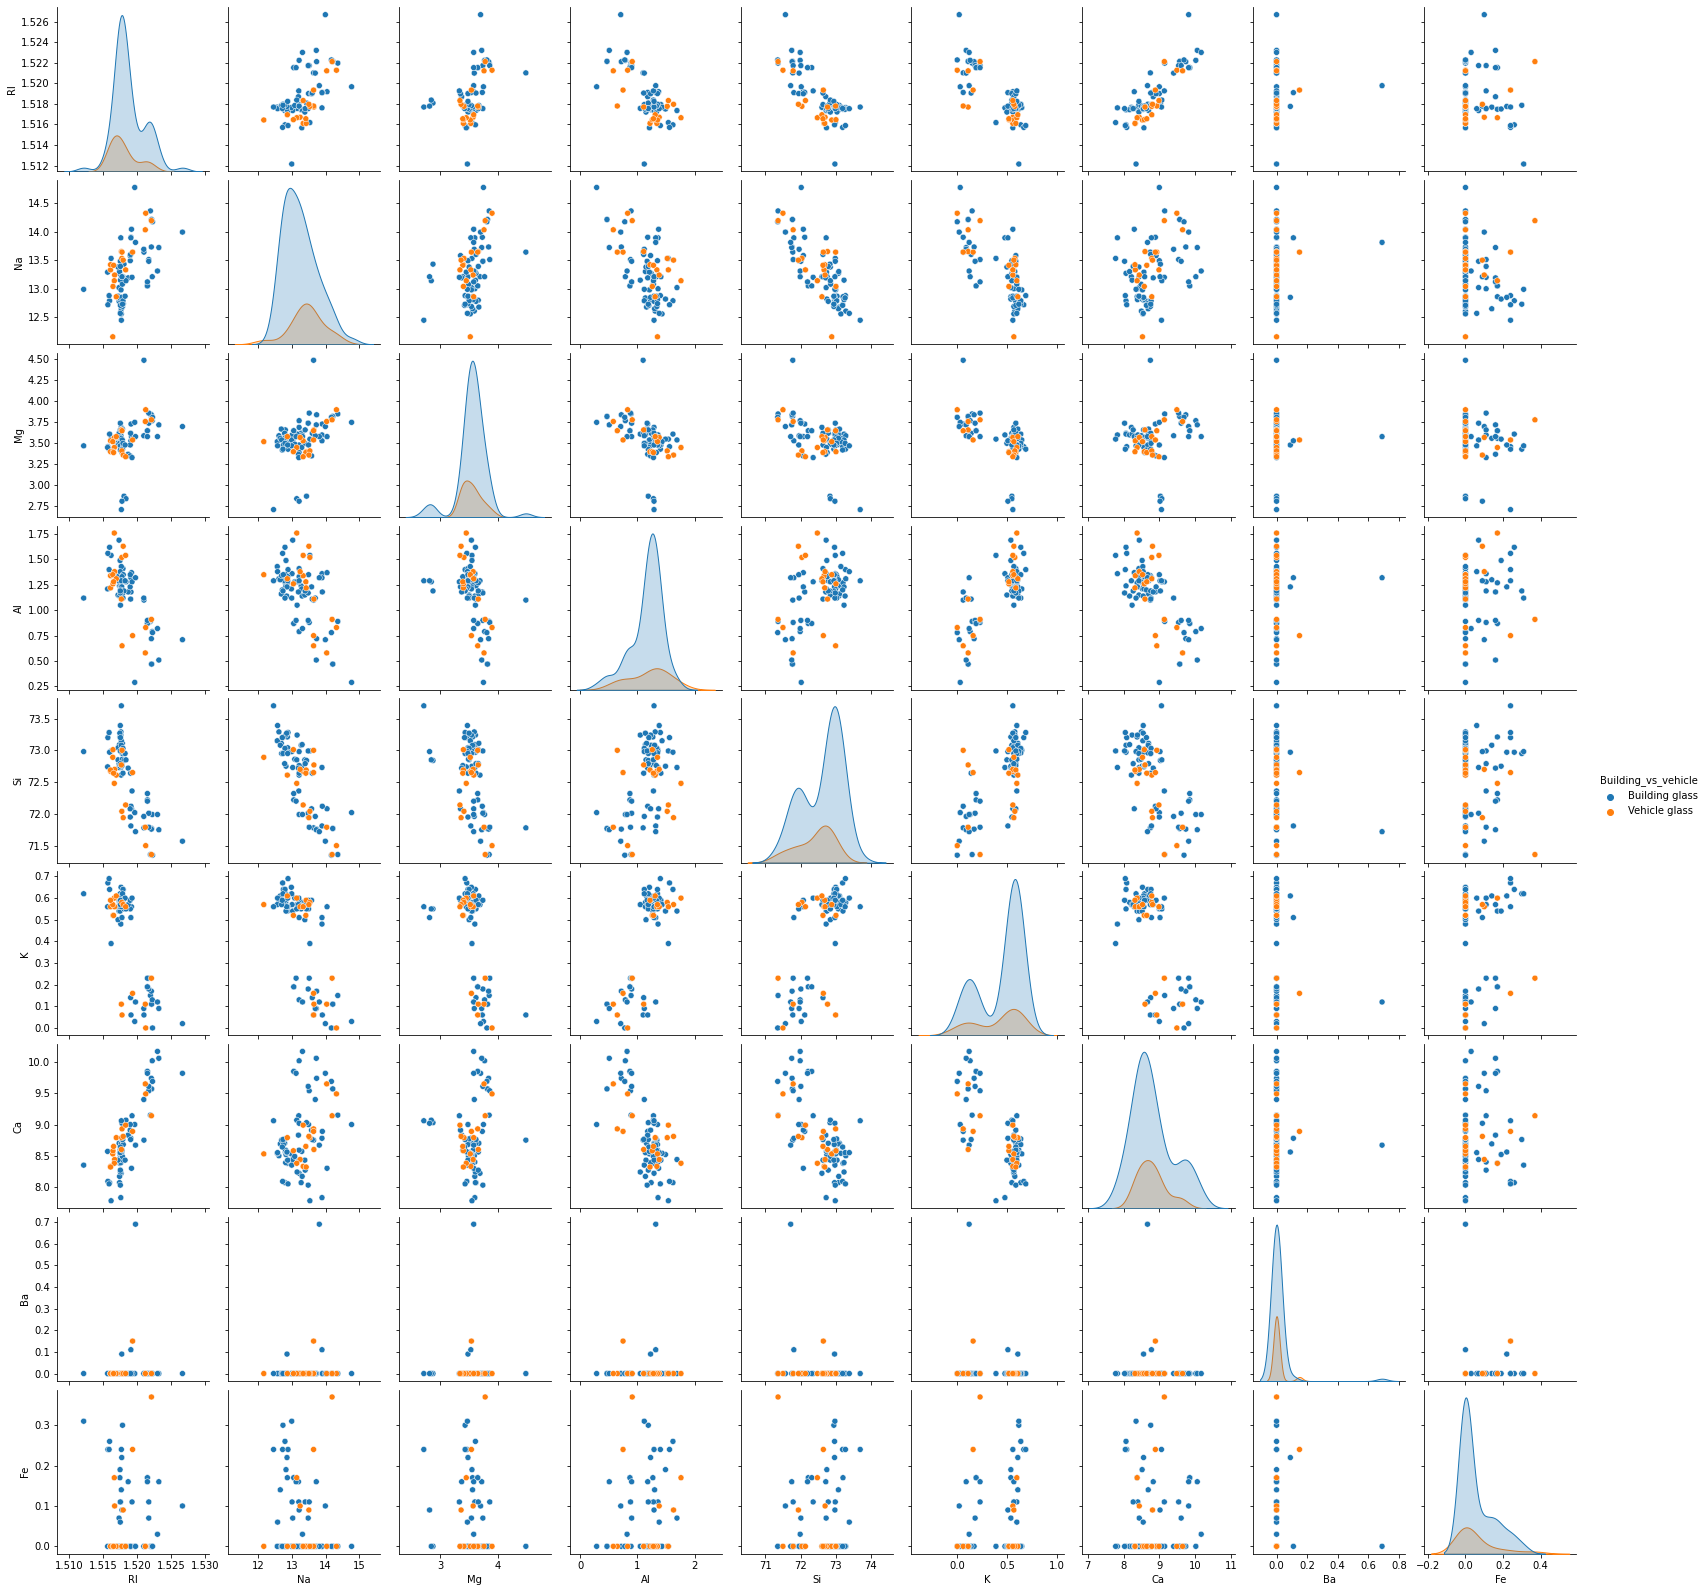

In [ ]:
sns.pairplot(df5.drop(columns=['Type of glass','Window_or_not']), hue='Building_vs_vehicle')
plt.savefig('Building vs vehicle pairplot.png', bbox_inches='tight')

In [31]:
tstats, pvals, _ = ttest_ind(df5.loc[df5['Building_vs_vehicle'] =='Building glass', cols[1:-1]], df5.loc[df5['Building_vs_vehicle'] =='Vehicle glass', cols[1:-1]], usevar='unequal')
print(pvals)
alpha = 0.05
fwer = 1-(1-alpha)**8

bool_res, pvals_cor, _, alpha_bon = multipletests(pvals, alpha= fwer, method='bonferroni')

print('The variables found to be significant are:')
print('\n'.join([col for i, col in enumerate(cols[1:-1]) if bool_res[i]]))
print()

print('The corrected pvals are:')
print(pvals_cor)
print()

print('The Bonferroni correction is')
print(alpha_bon)

[0.17169682 0.16689432 0.85776109 0.68384792 0.14195324 0.51120366
 0.90140307 0.77173606 0.99835738]
The variables found to be significant are:


The corrected pvals are:
[1. 1. 1. 1. 1. 1. 1. 1. 1.]

The Bonferroni correction is
0.03739772985677086


In [ ]:
df6 = df3.loc[df3['Window_or_not']=='Non-window glass',:].copy()

df6

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Window_or_not
Id number,,,,,,,,,,,
164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,containers,Non-window glass
165,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,containers,Non-window glass
166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00,containers,Non-window glass
167,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,containers,Non-window glass
168,1.51969,12.64,0.00,1.65,73.75,0.38,11.53,0.00,0.00,containers,Non-window glass
169,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,containers,Non-window glass
170,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00,containers,Non-window glass
171,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,containers,Non-window glass
172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,containers,Non-window glass


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


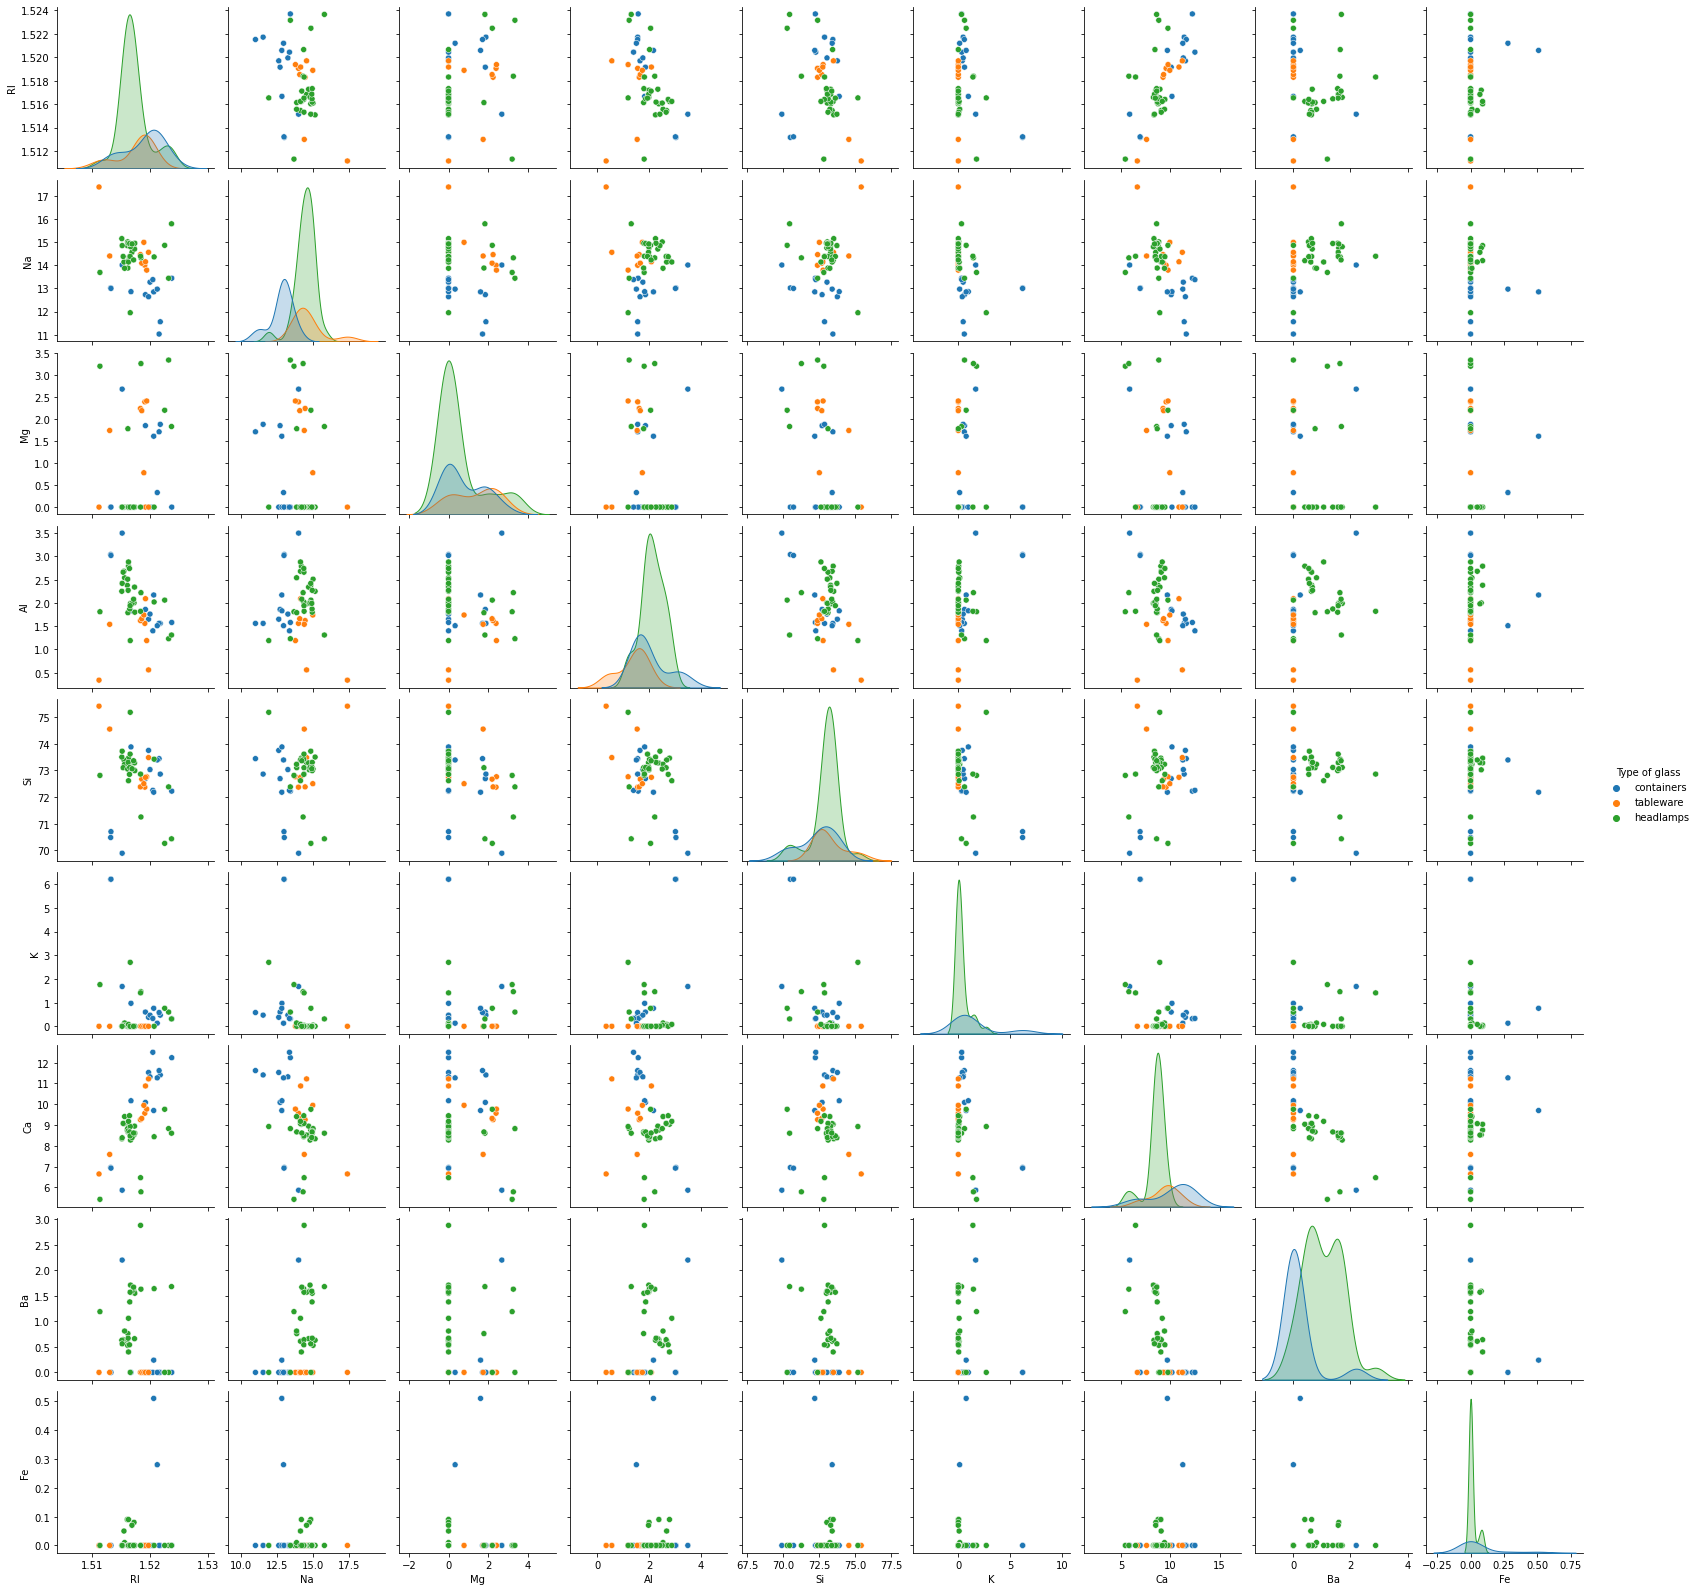

In [ ]:
sns.pairplot(df6.drop(columns='Window_or_not'), hue='Type of glass');
plt.savefig('Non-window glasses pairplot.png', bbox_inches='tight');